In [10]:
"""
    Student:        Byron Dowling
    Class:          Computer Vision (CSE 60535)
    Term:           University of Notre Dame, Fall 2023
    Assignment:     Quiz #3
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt


def CannyEdgeDetector(image):

	# Compute the median of the pixel intensities
	med = np.median(image)

	# Apply Canny edge detection using the computed median 
    # in defining lower and upper thresholds for hysteresis
	lower = int(max(0, 0.8 * med))
	upper = int(min(255, 1.2 * med))
	edgeImage = cv2.Canny(image, lower, upper)

	# Return the edged image
	return edgeImage

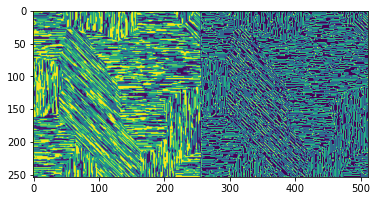

In [11]:
# Load our pattern
gray = cv2.imread('pattern.png',cv2.IMREAD_GRAYSCALE)

# This is what happens when we apply edge detector directly on this image
edgeImageCanny = CannyEdgeDetector(gray)
images = np.hstack((gray, edgeImageCanny))
# cv2.imshow("Not what we wanted ...",images)
plt.imshow(images)

In [12]:
'''
    Step 1: build the Gabor kernel that will enhance for us vertically oriented patches:
    cv2.getGaborKernel(ksize, sigma, theta, lambda, gamma, psi, ktype)

    where:
        ksize  - size of kernel in pixels (n, n), i.e., size of our neighborhood
        sigma  - size of the Gaussian envelope, i.e., how wide is our Gaussian "hat"
        theta  - orientation of the normal to the filter's oscilation pattern; e.g., theta = 0.0 means vertical stripes
        lambda - wavelength of the sinusoidal oscilation; this together with sigma 
                    is resposinble for frequencies enhanced by this filter
        gamma  - spatial aspect ratio; keep it 1
        phi    - phase offset; keep it 0
        ktype  - type and range of values that each pixel in the gabor kernel can hold; keep it cv2.CV_32F

'''

# ***TASK*** Select parameters of your Gabor kernel here:
ksize = 10      # try something between 5 and 15
sigma = 3       # try something between 2.0 and 4.0
theta = 0.0     # keep it 0.0 if you want to focus on vertically-oriented patterns 
lbd = 3         # try something between 2.0 and 4.0
gamma = 1.0     # keep it 1.0
psi = 0.0       # keep it 0.0

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lbd, gamma, psi, ktype=cv2.CV_32F)

# Normalize the kernel and remove the DC component
kernel /= kernel.sum()
kernel -= kernel.mean()

# Curious how it looks? Here we go:
# xx, yy = np.mgrid[0:kernel.shape[0], 0:kernel.shape[1]]
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot_surface(xx, yy, kernel ,rstride=1, cstride=1, cmap=plt.cm.gray,linewidth=0)
# plt.show()

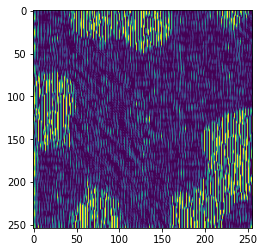

In [13]:
res1 = cv2.filter2D(gray, cv2.CV_8UC3, kernel)
plt.imshow(res1)

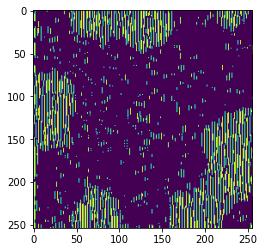

In [26]:
# Step 3: image binarization (let's use an idea with maximization of the Fisher ratio, implemeted by Otsu)
th2, res2 = cv2.threshold(res1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(res2)

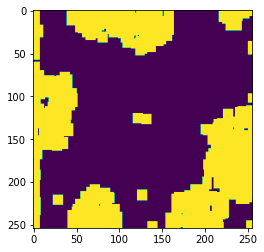

In [28]:
"""
    Step 4: morphological operations
    ***TASK*** Choose the type among cv2.MORPH_CLOSE, cv2.MORPH_OPEN, cv2.MORPH_ERODE or cv2.MORPH_DILATE
    (or a sequence of those, in the order you think makes sense)

    After image binarization, need to do some blurring to shade the regions of the vertical lines

        - After some testing, median Blur worked better than Gaussian with the above parameters
        - Also tested some erosion and dilation, dilation seemed to isolate these regions better
"""

# res2 = cv2.GaussianBlur(res2,(5,5),0)
res2 = cv2.medianBlur(res2,3)
res2 = cv2.dilate(res2,kernel,iterations=1)
#res2 = cv2.erode(res2,kernel,iterations=1)
plt.imshow(res2)

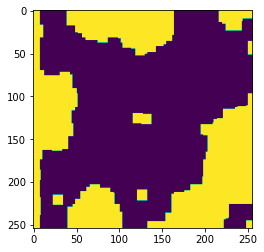

In [29]:
"""
    Tested these three morph operations:
        - cv2.MORPH_GRADIENT
        - cv2.MORPH_CLOSE 
        - cv2.MORPH_OPEN

        Morph close seemed to work the best
"""
gradient = cv2.morphologyEx(res2, cv2.MORPH_CLOSE, kernel)
plt.imshow(gradient)

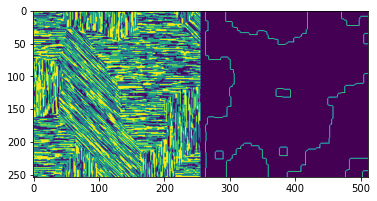

In [30]:
"""
    Running edge detector on the above result isolates the edge lines in a similar manner
    as the sample image.
"""
edgeImageCanny = CannyEdgeDetector(gradient)
images = np.hstack((gray, edgeImageCanny))
plt.imshow(images)